<a href="https://colab.research.google.com/github/AghaHuzaifaKhan/Furniture-Sales-Forecast/blob/ANN_Code/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Import files from google.colab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
uploaded = files.upload()  # This will prompt you to upload the file

# Step 2: Load the dataset
df = pd.read_excel('E-commerce_Dataset102.xlsx')

Saving E-commerce_Dataset102.xlsx to E-commerce_Dataset102 (6).xlsx


In [12]:
df = df.dropna(subset=['Sales', 'Quantity'])

# Fill missing values only for numerical columns with their mean values
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Feature Engineering: Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category',
                                         'Product', 'Order_Priority', 'Payment_method'], drop_first=True)

In [13]:
X = df_encoded.drop(['Sales', 'Order_Date'], axis=1)  # Drop target and irrelevant columns
y = df_encoded['Sales']  # Target variable is 'Sales'

In [14]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions for both training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [15]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:

print(f"Training Data Evaluation: MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")

# Print the evaluation metrics for test data in one line
print(f"Test Data Evaluation: MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

Training Data Evaluation: MAE: 0.33, MSE: 36.15, RMSE: 6.01, R²: 0.99
Test Data Evaluation: MAE: 0.28, MSE: 25.68, RMSE: 5.07, R²: 0.99


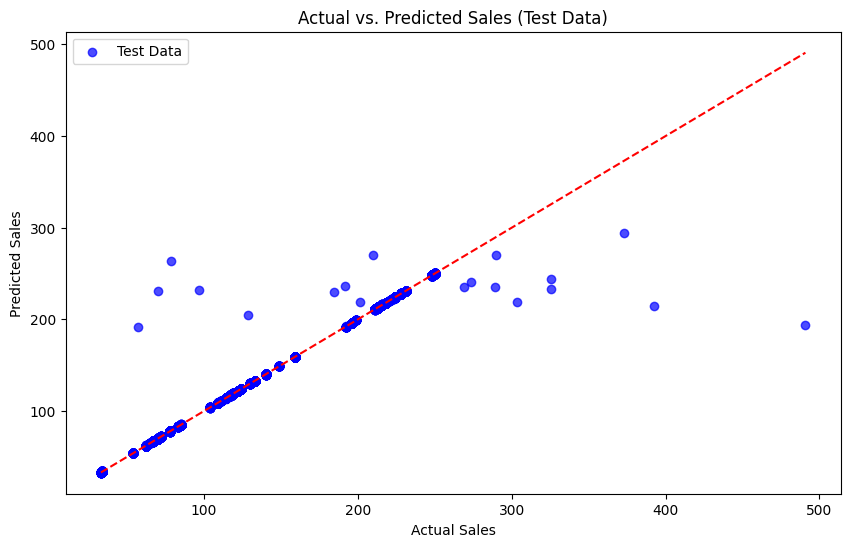

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Test Data)')
plt.legend()
plt.show()

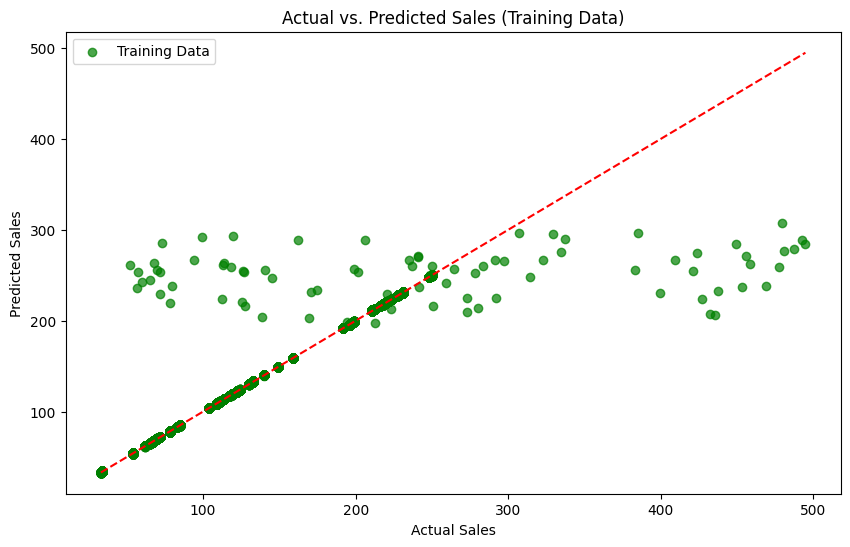

In [19]:

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='g', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Training Data)')
plt.legend()
plt.show()

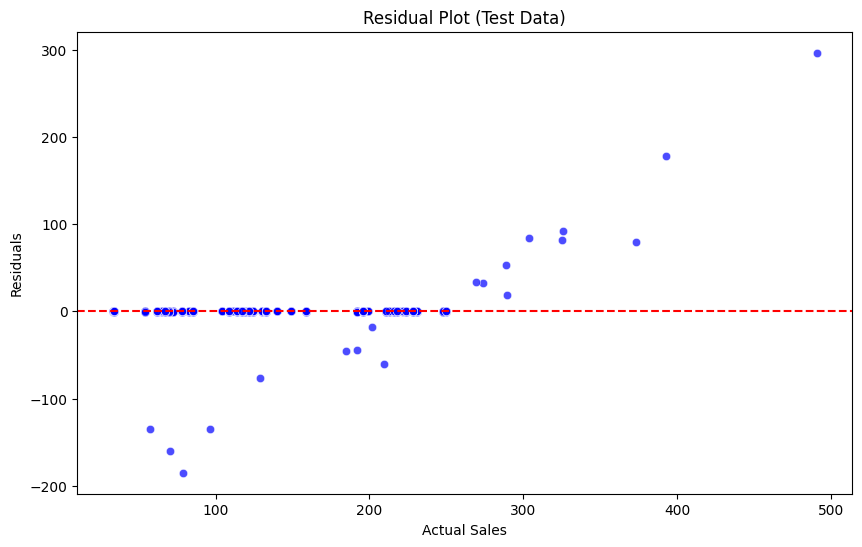

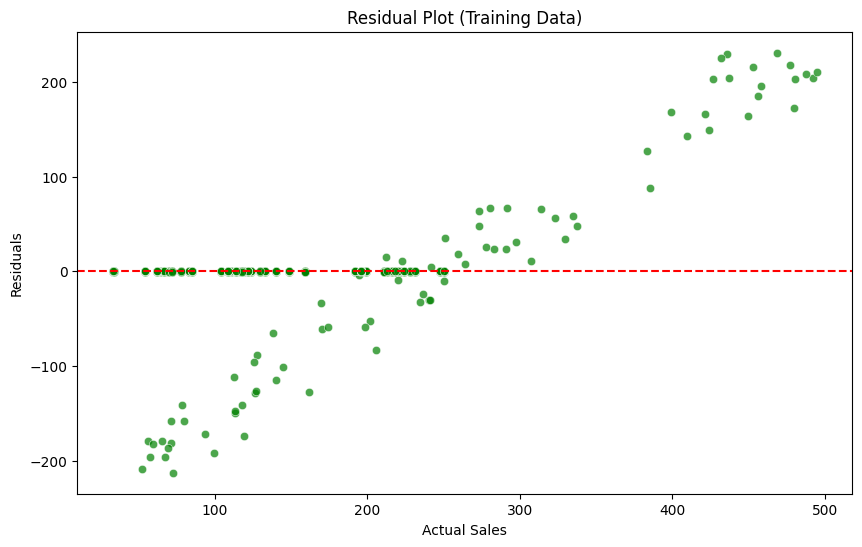

In [20]:
# Residuals: Test Data
test_residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_residuals, alpha=0.7, color='b')
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Data)')
plt.show()

# Residuals: Training Data
train_residuals = y_train - y_train_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=train_residuals, alpha=0.7, color='g')
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Data)')
plt.show()

    Dataset  Actual Sales  Predicted Sales
0  Training          70.0        69.941348
1  Training         218.0       217.980751
2  Training          62.0        61.946891
3  Training         117.0       116.870964
4  Training          67.0        66.809449


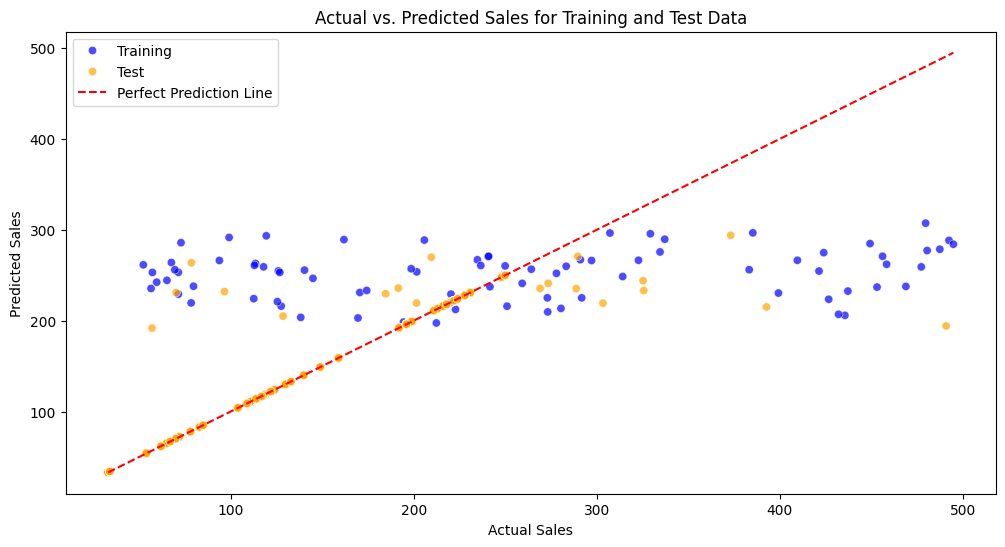

In [22]:
# Reset the index of y_train, y_test, y_train_pred, and y_test_pred to ensure alignment
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train_pred = pd.Series(y_train_pred).reset_index(drop=True)
y_test_pred = pd.Series(y_test_pred).reset_index(drop=True)

# Combine actual and predicted sales values into a single DataFrame
combined_comparison_df = pd.DataFrame({
    'Dataset': ['Training'] * len(y_train) + ['Test'] * len(y_test),
    'Actual Sales': pd.concat([y_train, y_test], axis=0).reset_index(drop=True),
    'Predicted Sales': pd.concat([y_train_pred, y_test_pred], axis=0).reset_index(drop=True)
})

# Display the combined DataFrame for verification
print(combined_comparison_df.head())

# Create a scatter plot for actual vs. predicted sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual Sales', y='Predicted Sales', hue='Dataset', data=combined_comparison_df, palette=['blue', 'orange'], alpha=0.7)
plt.plot([combined_comparison_df['Actual Sales'].min(), combined_comparison_df['Actual Sales'].max()],
         [combined_comparison_df['Actual Sales'].min(), combined_comparison_df['Actual Sales'].max()],
         '--', color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales for Training and Test Data')
plt.legend()
plt.show()